# GJ436

In [1]:
from glob import glob
import ombre as om
import numpy as np
import matplotlib.pyplot as plt

In [2]:
name = 'GJ436'
fnames = np.asarray(glob(f'/Users/ch/HST/data/{name}/*.fits'))
obs = om.Observation.from_files(fnames)

In [3]:
import lightkurve as lk
clc = lk.search_lightcurve(name, mission='TESS', author='SPOC').download_all().stitch().remove_nans()

In [4]:
obs

GJ-436 [4 Visits]

In [5]:
obs.fit_transit(x_suppl=clc.time.value + 2457000,
                y_suppl=clc.flux.value/np.median(clc.flux.value),
                yerr_suppl=clc.flux_err.value/np.median(clc.flux.value),
                exptime_suppl=np.median(np.diff(clc.time.value)))

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

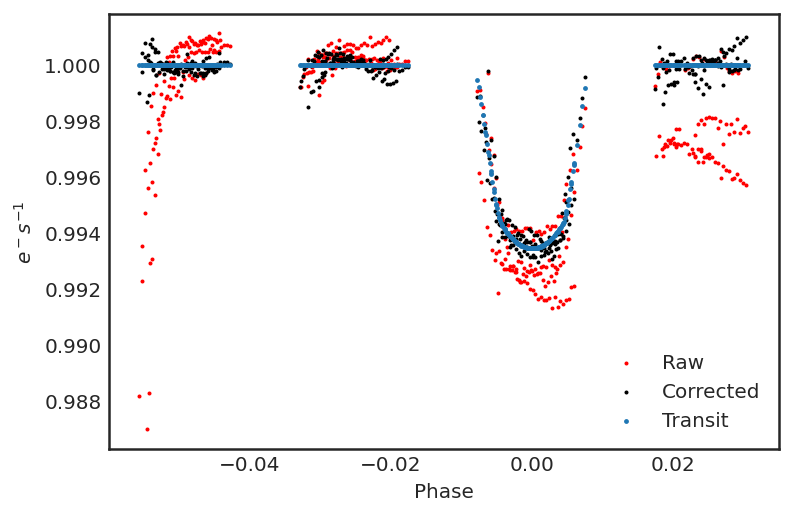

In [6]:
obs.plot()

In [7]:
obs.fit_model()

Fitting Transit/Eclipse Model:   0%|          | 0/4 [00:00<?, ?it/s]

Fitting Transit/Eclipse Model:  25%|██▌       | 1/4 [00:20<01:02, 20.77s/it]

Fitting Transit/Eclipse Model:  50%|█████     | 2/4 [00:40<00:40, 20.23s/it]

Fitting Transit/Eclipse Model:  75%|███████▌  | 3/4 [01:00<00:20, 20.00s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 4/4 [01:20<00:00, 19.90s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 4/4 [01:20<00:00, 20.02s/it]

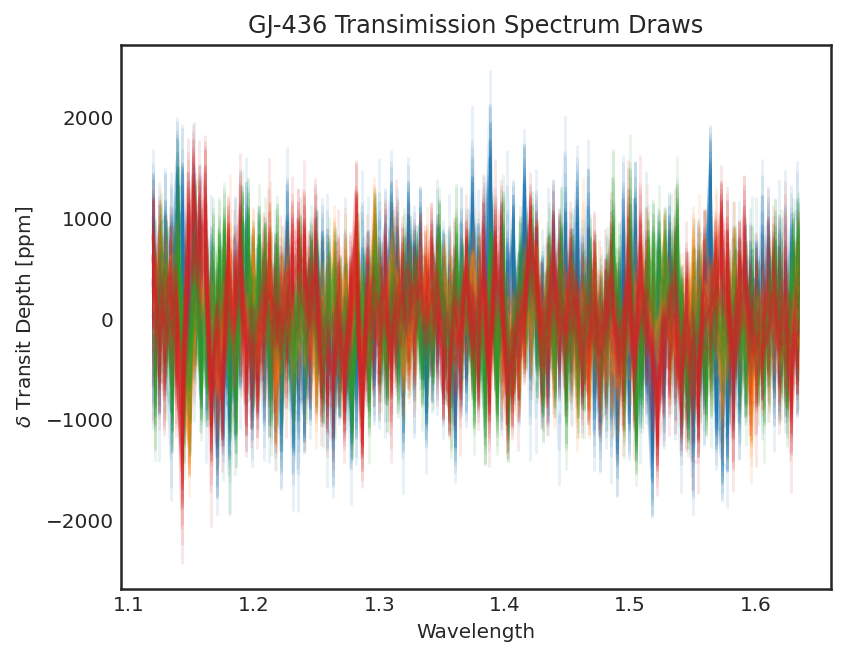

In [8]:
obs.plot_spectra()

<AxesSubplot:title={'center':'GJ-436 Transmission Spectrum, Visit: 1'}, xlabel='Wavelength', ylabel='$\\delta$ Transit Depth [ppm]'>

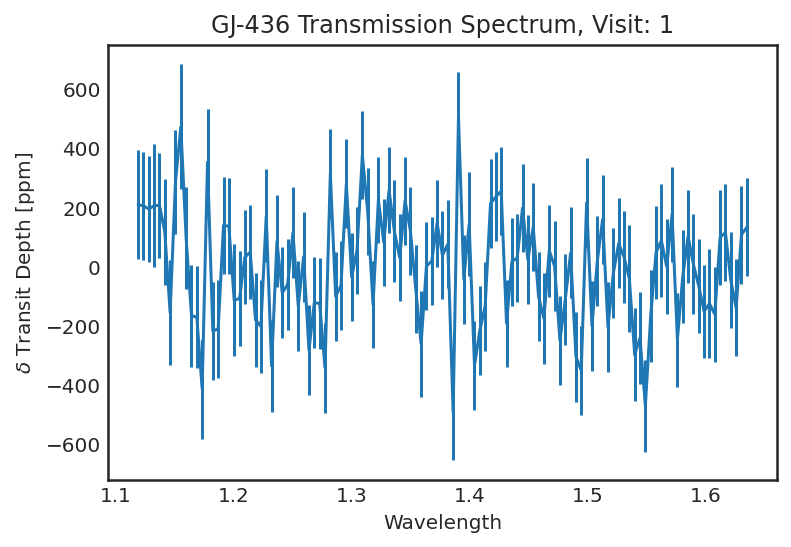

In [9]:
om.Spectra([visit.transmission_spectrum for visit in obs]).flatten().bin(bins=np.linspace(0.8, 1.7, 200)).plot()

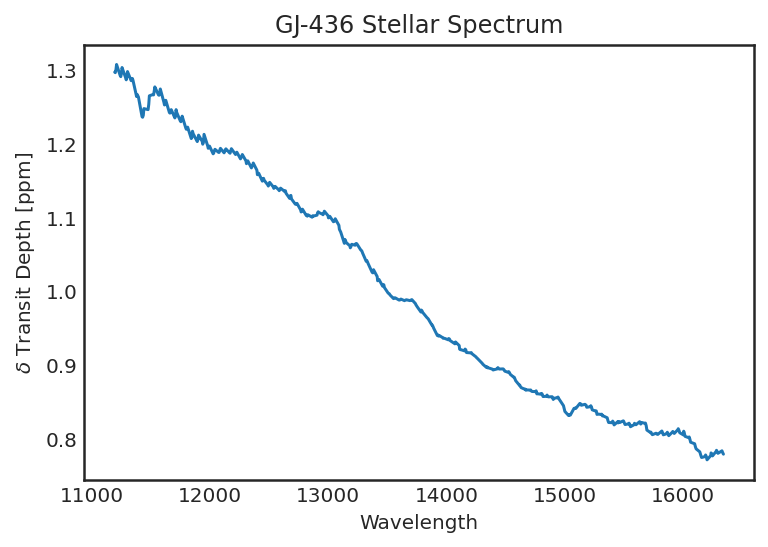

In [10]:
spec = obs.stellar_spectra
spec.plot()
spec.hdulist.writeto(f'results/{name}_stellar_spectrum.fits', overwrite=True)

In [11]:
from astropy.io import fits
try:
    hdulist = om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_transmission.fits')
except:
    pass
try:    
    hdulist = om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_emission.fits')
except:
    pass

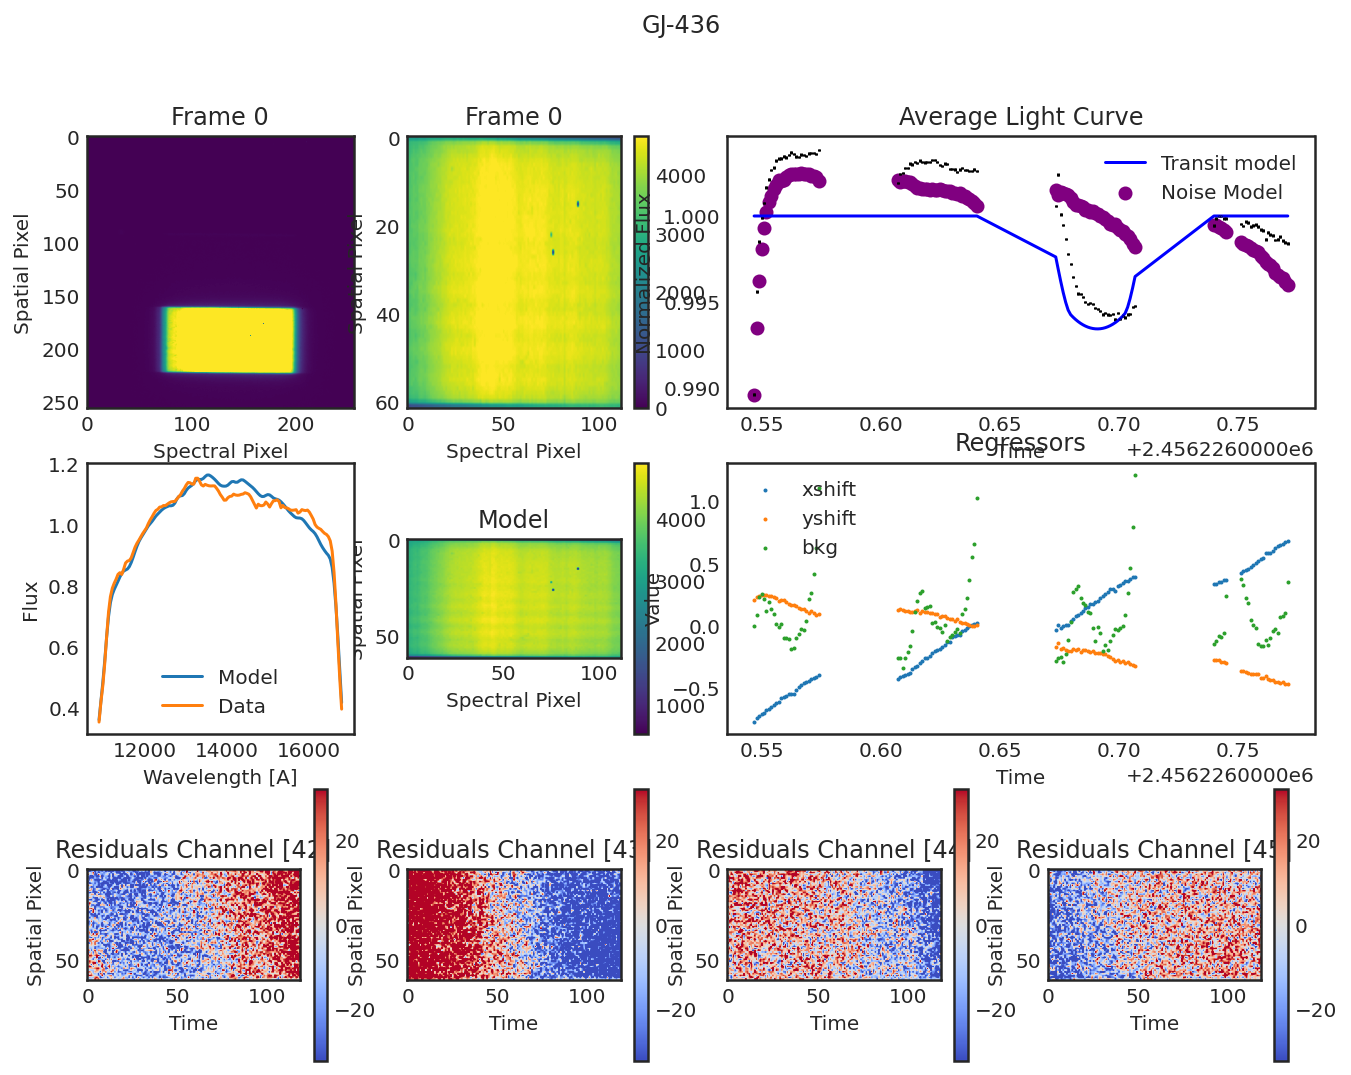

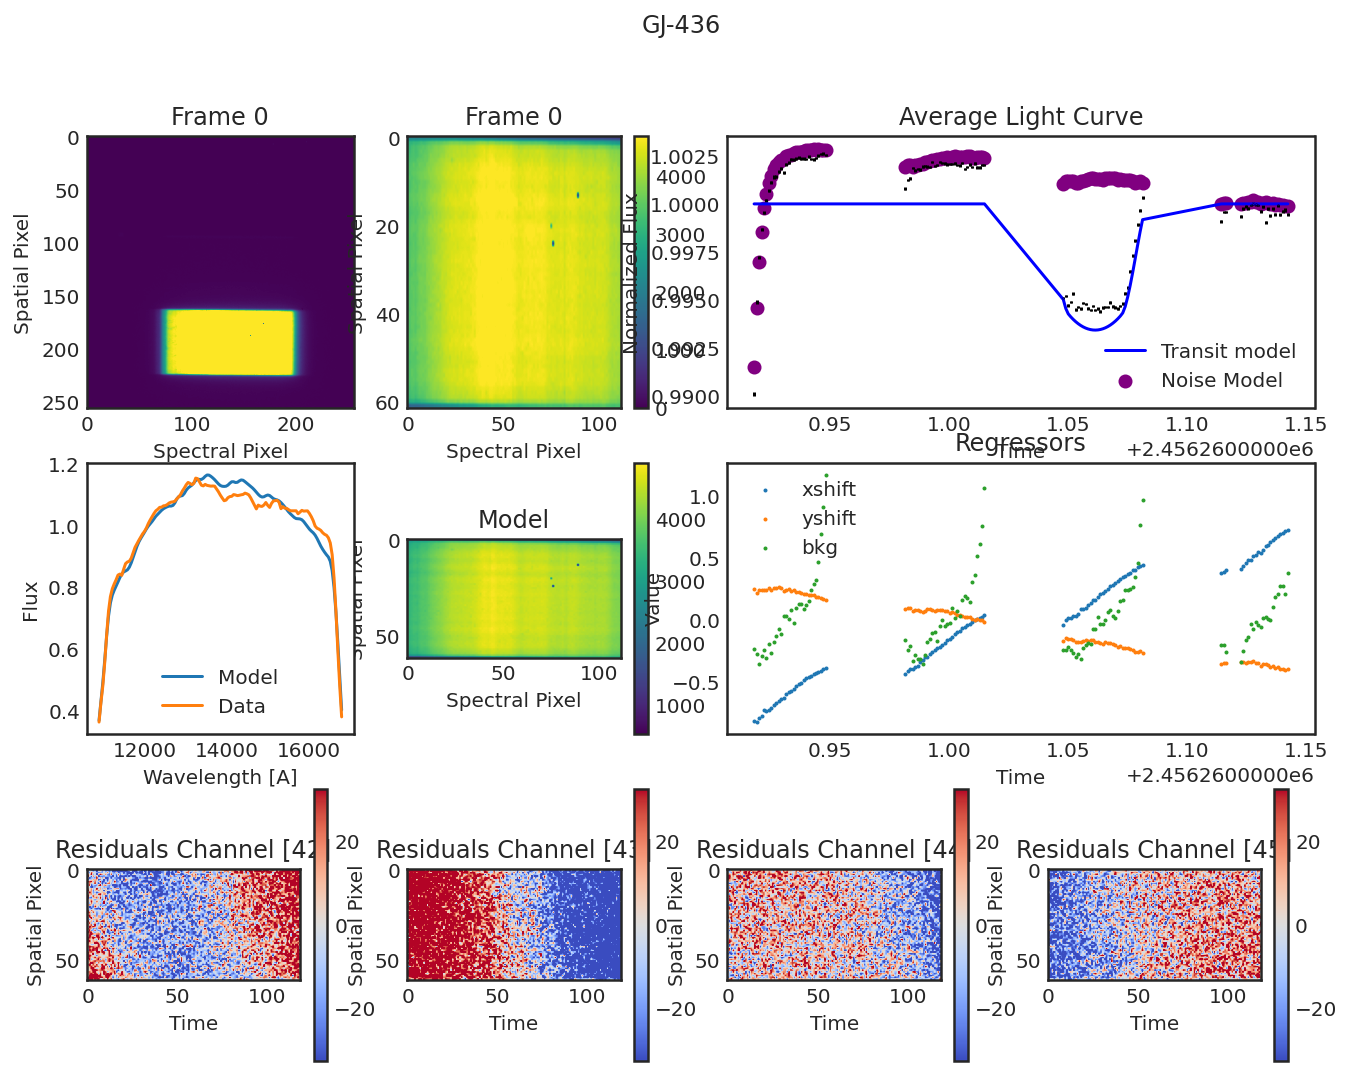

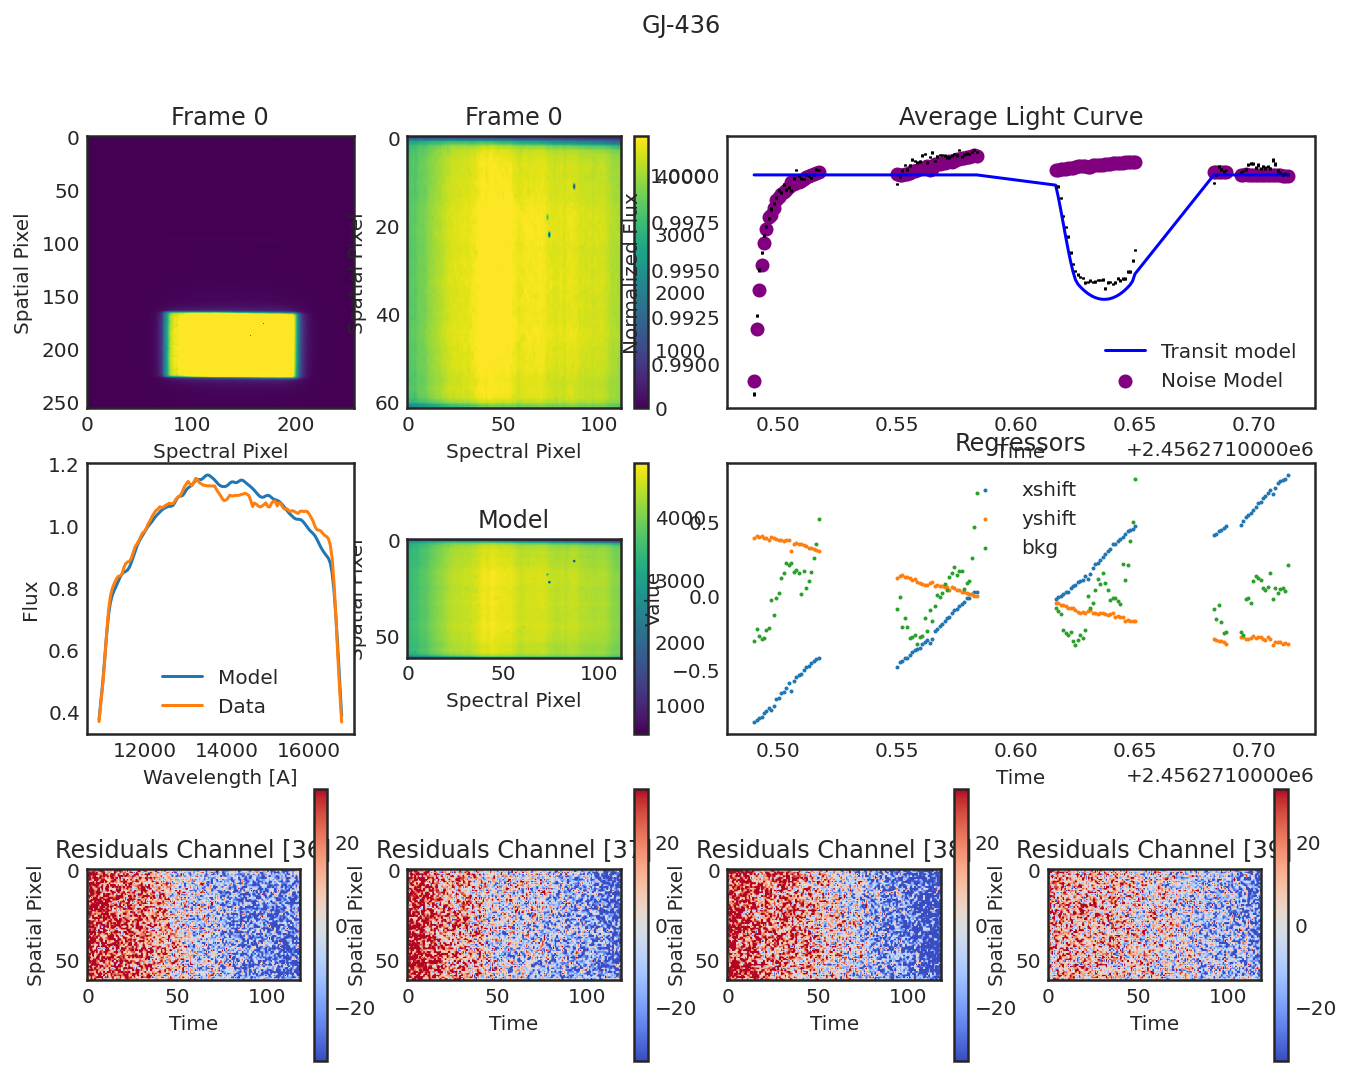

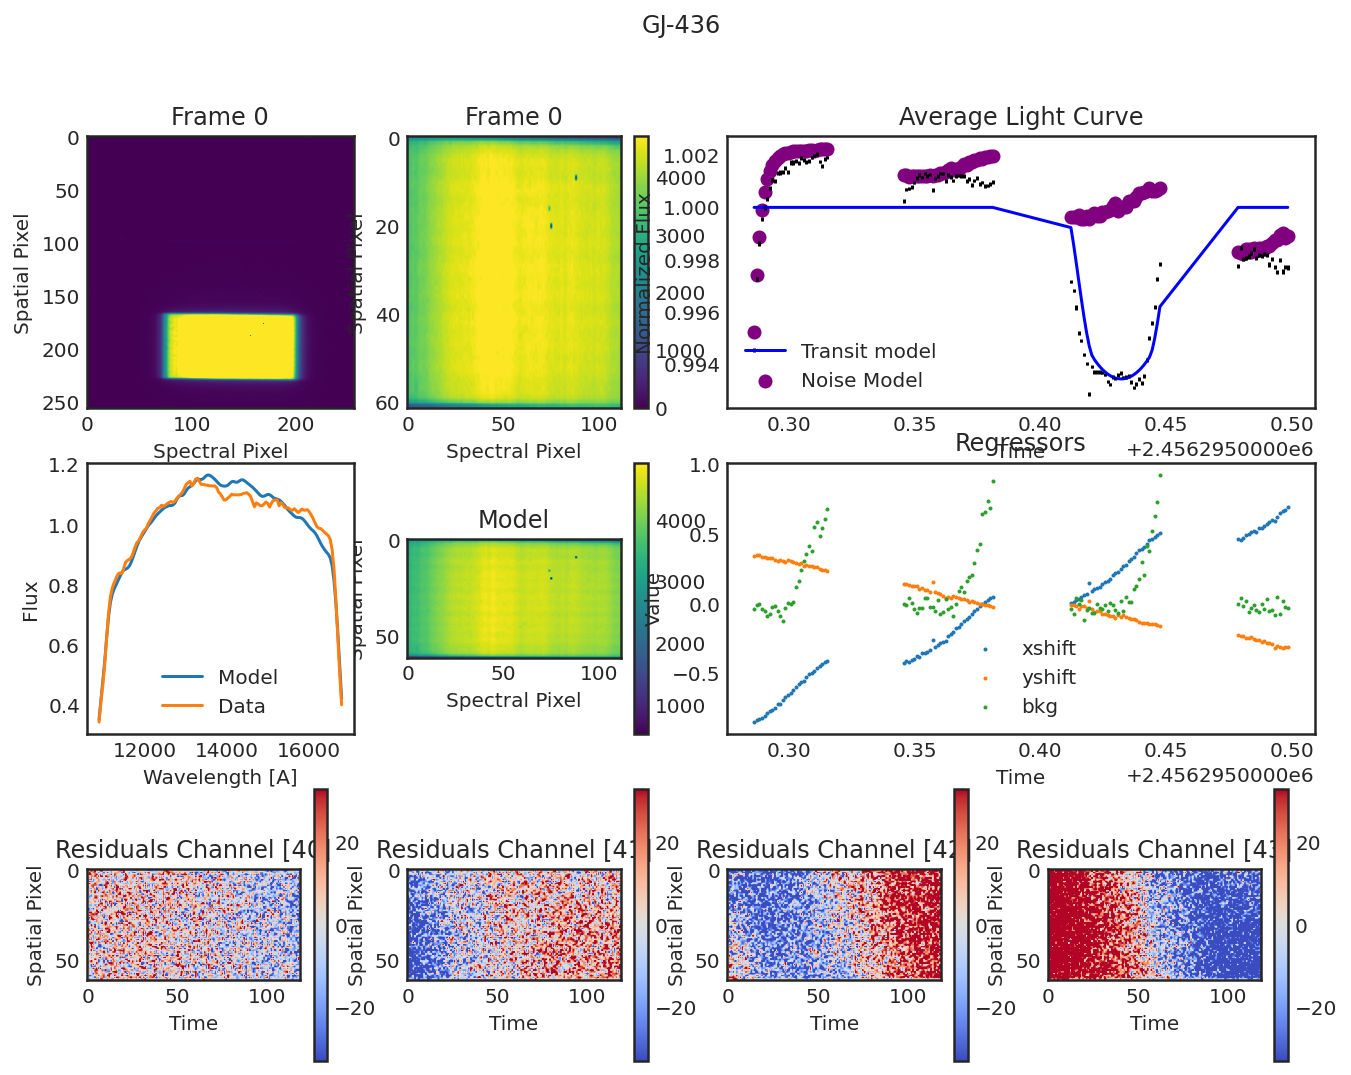

In [12]:
for visit in obs:
    visit.diagnose();
    plt.show();